In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [17]:
housing_data = pd.read_csv('housing.csv')

In [18]:
# See head of the dataset
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
columns_names = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [22]:
data.columns = columns_names

In [7]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [23]:
columns_names_new = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']

In [25]:
means_data = []
for i in columns_names_new:
    means_data.append(np.ceil(np.mean(data[str(i)])))

In [26]:
print(means_data)

[4.0, 12.0, 12.0, 1.0, 1.0, 7.0, 69.0, 4.0, 10.0, 19.0, 13.0]


In [27]:
std_data = []
for i in columns_names_new:
    std_data.append(np.ceil(np.std(data[str(i)])))

In [28]:
print(std_data)

[9.0, 24.0, 7.0, 1.0, 1.0, 1.0, 29.0, 3.0, 9.0, 3.0, 8.0]


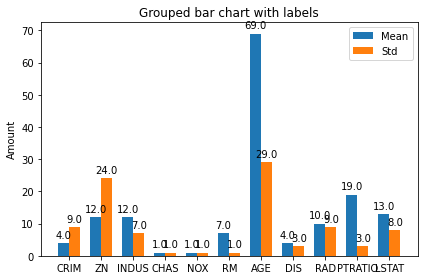

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = columns_names_new
means_data;
std_data;

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, means_data, width, label='Mean')
rects2 = ax.bar(x + width/2, std_data, width, label='Std')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Amount')
ax.set_title('Grouped bar chart with labels')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

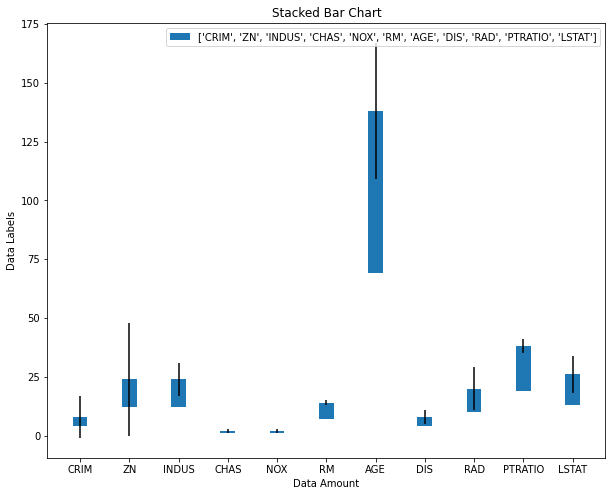

In [30]:
plt.figure(figsize=(10, 8))
plt.bar(columns_names_new, means_data, width = 0.3,yerr =std_data, bottom=means_data, label = columns_names_new)
plt.title("Stacked Bar Chart")
plt.xlabel("Data Amount")
plt.ylabel("Data Labels")
plt.legend()
plt.show()

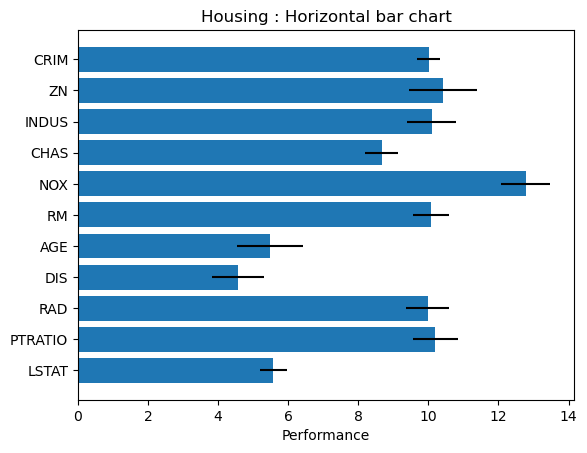

In [31]:
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
labels = columns_names_new
y_pos = np.arange(len(labels))
performance = 3 + 10 * np.random.rand(len(labels))
error = np.random.rand(len(labels))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Housing : Horizontal bar chart')

plt.show()

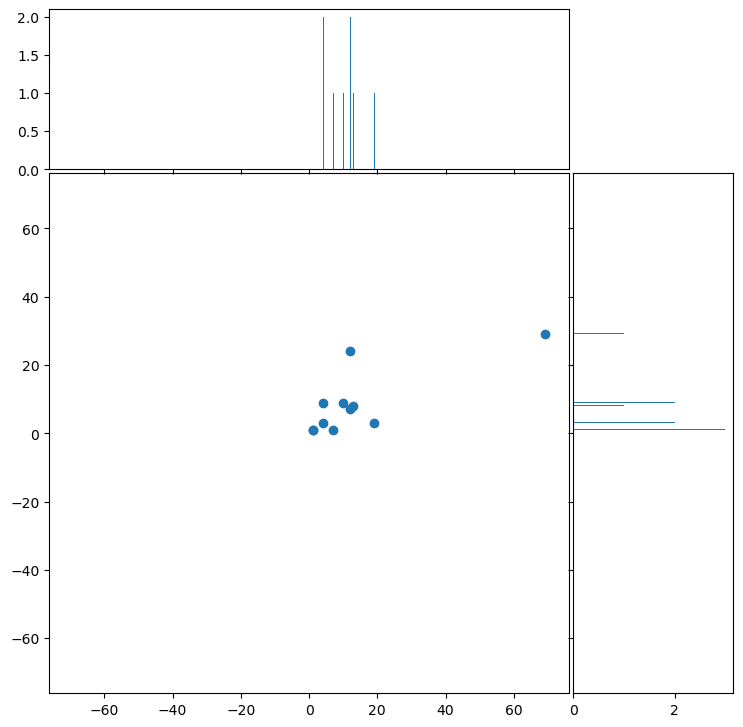

In [32]:
np.random.seed(19680801)

# some random data
x = means_data
y = std_data


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')
    # definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()

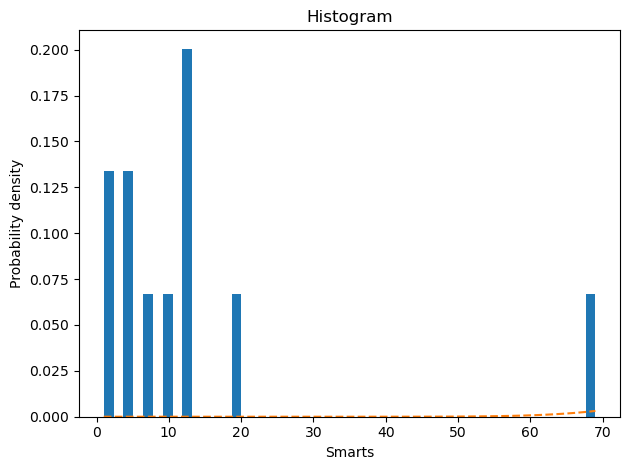

In [33]:
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
value = mu + sigma * np.random.randn(437)
x = means_data
y =std_data
num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram')
# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()